<a href="https://colab.research.google.com/github/Dracomp89/Eduardo-Phillips---202115611-Juan-Esteban-Sanchez---202213476/blob/main/Parcial_2/Parcial_2_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eduardo-Phillips---202115611-Juan-Esteban-Sanchez---202213476

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 24. Un modelo Geocientıfico de moda es la tierra plana.

Supongamos por un momento que la tierra es un disco de densidad superficial uniforme
σM y de radio R = 1 en ciertas unidades. Usando la ley de gravitacion de Newton, el
campo gravitacional en direccion k queda determinado por la siguiente integral elıptica:
$g_k(x, y, z) = −k∫_{0}^{R}∫_{0}^{2π}​ \frac{zrdϕdr}{(x^2+y^2+z^2−2rxcosϕ−2rysinϕ)^{3/2}}​
$
donde k = 1.9429303960 es una constante que se ajusta para que la gravedad sea g =−9.813646 en la posicion (0., 0., 0.2), es decir en el polo norte.

(a) Cargue N = 50 puntos y pesos de Gauss para calcular el campo gravitacional sobre
el disco.


In [ ]:

R=1
a=0
b=2*np.pi
c=0
d=R
k = 1.9429303960
N = 50
x,y,z=(0., 0., 0.2)
roots, weights = np.polynomial.legendre.leggauss(N)


(b) Defina la funcion de la Ecuacion

la ecuacion CORRECTA es $ −k∫_{0}^{R}∫_{0}^{2π}​ \frac{zrdϕdr}{(x^2+y^2+z^2+r^2−2rxcosϕ−2rysinϕ)^{3/2}}​
$

In [1]:
def f(phi,r):
    d = (x**2 + y**2 + z**2 + r**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**(3/2)
    return (r*z)/d



(c) Defina una funcion para calcular la integral usando la forma de doble cuadratura
(Ecuacion (4.170)).

In [ ]:
t_phi = 0.5*( (b-a)*roots + b + a )
w_phi = 0.5*( (b-a)*weights )
t_r = 0.5*( (d-c)*roots + d + c )
w_r = 0.5*( (d-c)*weights )

def g_k():
  lm=0
  for i in range(N):
    lm+=w_phi[i]*np.dot(w_r, [f(t_phi[i], p) for p in t_r])
  return -k*lm

(d) Verifique que el campo gravitacion en el punto (0., 0., 0.2) es efectivamente g = −9.813646 m/s2
. (No avance si no obtiene el resultado correcto).

In [ ]:
x,y,z=(0., 0., 0.2)
g_k()

-9.813646786905922

(e) Usando coordenadas polares:

x = rcosθ
y = rsinθ, (4.209)
estudie el comportamiento azimutal del campo $g_k(x, y, 0.2)$, es decir, fije un valor
del radio en R = [0, 0.125, 0.25, 0.38, 0.5] y calcule el campo para diez valores de $ϕ$;
phi = np.linspace(0,2*np.pi,10).

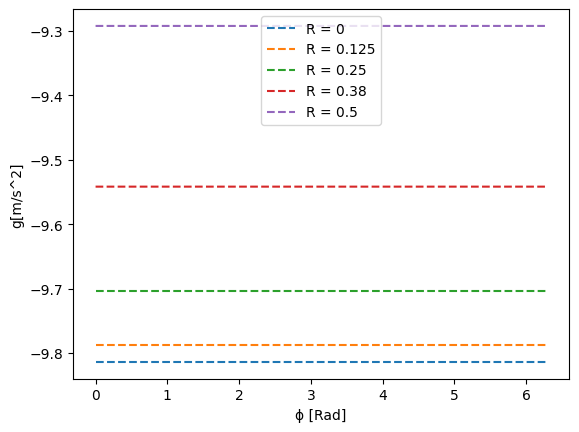

In [ ]:
R = [0, 0.125, 0.25, 0.38, 0.5]
phi = np.linspace(0, 2 * np.pi, 10)

for r in R:
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    z = 0.2
    plt.plot(phi,g_k(), linestyle='--',label=f'R = {r}')

plt.xlabel('ϕ [Rad]')
plt.ylabel('g[m/s^2]')
plt.legend()
plt.show()

(f) ¿Como interpreta que la gravedad no depende del angulo sobre la tierra?

En una esfera como lo es la tierra, la distancia al centro de masa siempre sera la misma en la superficie de esta, por lo que la magnitud de la gravedad no cambia


(g) ¿Que valores tiene la gravedad en el ecuador R = 0.5 y en el borde R = 1?

In [ ]:
x=0.5*np.cos(phi[0])
y=0.5*np.sin(phi[0])
z=0.2
g_05=g_k()

x=1*np.cos(phi[0])
y=1*np.sin(phi[0])
z=0.2
g_1=g_k()

print("La gravedad en el ecuador es: ", g_05)
print("La gravedad en el borde es: ", g_1)

La gravedad en el ecuador es:  -9.2926203916655
La gravedad en el borde es:  -4.673047117443013


(h) ¿Que podrıa decirle a un amigo terraplanista con base a sus resultados teoricos?

Que no tiene sentido que la tierra sea un disco plano pues la gravedad en el "polo sur" seria la mitad de lo que lo es en el polo norte

#26. Considera la funcion $f(x) = x^3$ en el intervalo [0, 2]. Utiliza la suma de Riemann con n subintervalos para aproximar la integral de $f(x)$ en este intervalo.

$\int_0^{2} x^3 dx$

(e) (computacional) Escriba un codigo para encontrar la aproximacion de la integral
para n = 30.

In [ ]:
def f(x):
    return x**3

a = 0
b = 2
n = 30

dx = (b - a) / n

x_i = np.linspace(a, b, n+1)

f_x_i = f(x_i)

suma_riemann = np.sum(f_x_i[:-1]) * dx


print(f"Valor aproximado de la integral utilizando suma de Riemann: {suma_riemann}")
4*(1-(2/n)+(1/n**2))

Valor aproximado de la integral utilizando suma de Riemann: 3.7377777777777776


3.7377777777777776

(f) Dibuje el error de la estimacion $ϵ = |I_{exacta} − I_{estimada}|$ como una funcion de n. Use
un array np.linspace(30,400,100, endpoint = False).

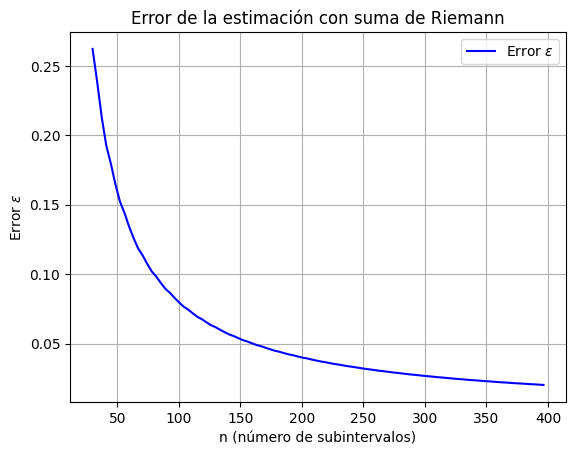

In [ ]:

I_exacta = 4

n_values = np.linspace(30, 400, 100, endpoint=False)


def E(n):
  errors = []
  for n in n_values:
      n = int(n)
      dx = 2 / n
      x_i = np.linspace(0, 2, n, endpoint=False)
      f_x_i = f(x_i)
      I_estimada = np.sum(f_x_i) * dx
      error = np.abs(I_exacta - I_estimada)
      errors.append(error)
  return errors


plt.plot(n_values, E(n_values), label='Error $\\epsilon$', color='blue')
plt.xlabel('n (número de subintervalos)')
plt.ylabel('Error $\\epsilon$')
plt.title('Error de la estimación con suma de Riemann')
plt.grid(True)
plt.legend()
plt.show()



# 27. En este problema, va a encontrar la regla de cuadratura de 4 puntos usando la definicion formal y la base polinomial canonica: $x_0, x_1, ..., x_n$.

(a) La definicion de regla de cuadratura de Gauss esta dada por:

$∫_{−1}^{1}x^kdx=∑_{i=0}^{3} w_i(x_i)^k , k=0,1,…,N$

Para la regla de 4 puntos, necesitamos N = 8 ecuaciones no-lineales para encontrar

las 8 constantes:

$\int_{-1}^{1} x^0 \, dx = w_0 + w_1 + w_2 + w_3$

$\int_{-1}^{1} x^1 \, dx = w_0 x_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$

Escriba las ocho ecuaciones e implemente usando la tupla usada en clase:


el sistema de ecuaciones es:

$\int_{-1}^{1} x^0 \, dx = w_0 + w_1 + w_2 + w_3$

$\int_{-1}^{1} x^1 \, dx = w_0 x_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$

$\int_{-1}^{1} x^2 \, dx = w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2 + w_3 x_3^2$

$\int_{-1}^{1} x^3 \, dx = w_0 x_0^3 + w_1 x_1^3 + w_2 x_2^3 + w_3 x_3^3$

$\int_{-1}^{1} x^4 \, dx = w_0 x_0^4 + w_1 x_1^4 + w_2 x_2^4 + w_3 x_3^4$

$\int_{-1}^{1} x^5 \, dx = w_0 x_0^5 + w_1 x_1^5 + w_2 x_2^5 + w_3 x_3^5$

$\int_{-1}^{1} x^6 \, dx = w_0 x_0^6 + w_1 x_1^6 + w_2 x_2^6 + w_3 x_3^6$

$\int_{-1}^{1} x^7 \, dx = w_0 x_0^7 + w_1 x_1^7 + w_2 x_2^7 + w_3 x_3^7$

que se convierten en:

$2 = w_0 + w_1 + w_2 + w_3$

$0 = w_0 x_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$

$\frac{2}{3} = w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2 + w_3 x_3^2$

$0 = w_0 x_0^3 + w_1 x_1^3 + w_2 x_2^3 + w_3 x_3^3$

$\frac{2}{5} = w_0 x_0^4 + w_1 x_1^4 + w_2 x_2^4 + w_3 x_3^4$

$0 = w_0 x_0^5 + w_1 x_1^5 + w_2 x_2^5 + w_3 x_3^5$

$\frac{2}{7} = w_0 x_0^6 + w_1 x_1^6 + w_2 x_2^6 + w_3 x_3^6$

$0 = w_0 x_0^7 + w_1 x_1^7 + w_2 x_2^7 + w_3 x_3^7$


In [ ]:
def G(r):
    xi = r[:4]
    w = r[4:]

    return [
        np.sum(w)-2,
        np.dot(xi,w) - 0,
        np.sum(w * xi**2)-(2/3),
        np.sum(w * xi**3) - 0,
        np.sum(w * xi**4)-(2/5),
        np.sum(w * xi**5) - 0,
        np.sum(w * xi**6)-(2/7),
        np.sum(w * xi**7) - 0]

(b) Modifique el codigo para que la funcion vectorial $F(x)$ reciba las ocho variables.

In [ ]:
def GetF(G, r):
    n = len(r)
    v = np.zeros(n)
    G_values = G(r)
    for i in range(n):
        v[i] = G_values[i]
    return v

(c) Modifique el codigo para calcular las 64 componentes que definen el Jacobiano.

In [ ]:
def GetJacobian(G, r, h=1e-5):
    n = len(r)
    J = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            rf = r.copy()
            rb = r.copy()
            rf[j] += h
            rb[j] -= h
            J[i, j] = (G(rf)[i] - G(rb)[i]) / (2 * h)
    return J

(d) Use el metodo del descenso del gradiente para estimar los 4 pesos $(w_i)$ y los 4 puntos de Gauss $(x_i)$. Tenga en cuenta que la semilla debe ser un vector aleatorio en el intervalo [-1,1], i.e, r0 = np.random.uniform( -1.,1.,size=8).


In [ ]:
def Metric(G, r):
    return 0.5 * np.linalg.norm(GetF(G, r))**2
x0 = np.random.uniform(-1, 1, 8)
Metric(G, x0)

11.099215206873462

In [ ]:
def Minimizer(G, r, lr=1e-3, epochs=4000, error=1e-6):
    metric = 1
    it = 0
    while metric > error and it < epochs:
        J = GetJacobian(G, r).T
        Vector = GetF(G, r)
        r = r - lr * np.dot(J, Vector)
        metric = Metric(G, r)
        it += 1
    return r, it
xsol, it = Minimizer(G, x0)
print("Puntos calculados (x_i):", xsol[:4])
print("Pesos calculados (w_i):", xsol[4:])
print("Iteraciones:", it)

Puntos calculados (x_i): [ 0.67244155 -0.26640144 -0.77770212  0.65464027]
Pesos calculados (w_i): [ 1.16652645  0.60144672  0.52102785 -0.31114133]
Iteraciones: 4000


(e) La tasa de aprendizaje puede ser γ = 0.01. Cuando la m´etrica sea menor a 0.005
ajuste la tasa a γ = 0.001 para tener una soluci´on m´as precisa. No se preocupe si
cada vez que corre el algoritmo llega a una soluci´on distinta. Parece que en R
8
, este
problema tiene un conjunto grande de m´ınimos locales.

In [ ]:
def Minimizer2(G, r, lr=1e-2, epochs=4000, error=1e-6):
    metric = 1
    it = 0
    while metric > error and it < epochs:
        if metric < 0.005:
            lr = 1e-3

        J = GetJacobian(G, r).T
        Vector = GetF(G, r)
        r = r - lr * np.dot(J, Vector)
        metric = Metric(G, r)
        it += 1

    return r, it


xsol, it = Minimizer2(G, x0)

(f) Utilice la regla encontrada para estimar la integral:

$\int_{-1}^{1} \cos(x) \, dx = \sum w_i f(x_i) \approx 1.68294168,$

su regla debe estimar la integral al menos con dos cifras de precisión: $ I
\approx 1.6 .$

In [ ]:
wi=xsol[4:]
xi=xsol[:4]
I=np.sum(wi*np.cos(xi))
I

1.6434003309394316

(g) ¿Cual es la razon de que esta estimacion sea tan poco precisa?

esto se puede deber a los multiples minimos locales de R8 lo que hace que el minimizador converga a valores distintos a los deseados, ya que aunque se aumente el numero de iteraciones, el valor no parece converger de manera que metric sea menor al error deseado

# 24. Estrategıa de la mejor inversion: el problema de la inversion se basa en la incertidumbre respecto a los eventos futuros que afectan el comportamiento de algun mercado. Vamos a suponer que se pueden dar 8 eventos en un mercado, y se dispone de un capital de $Ca = 1, 000, 000$. La cuota que paga el mercado por la inversion en el evento i-esimo esta dada por: $C = [8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69]$. (5.103)  

Donde los valores representan, indirectamente, la probabilidad de que ocurra cada evento.
Por ejemplo, la probabilidad del primer evento es: $P(0) =\frac {1}{8.51}$ . Se desea distribuir el
capital entre las 8 opciones de forma tal que se maximice el retorno de dinero sin importar
que opcion se realice.

Para maximizar el retorno de la inversion, se implementara una rutina genetica que sigue
los siguientes pasos:


(a) Definir el vector de cuotas $C$ .

In [ ]:
Ca=1000000
C=np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])


(b) Implementar la funci´on de retorno:
$R(w) = min_rCa (w ⊙ C − 1)$
donde ⊙ es el operador de producto elemento por elemento. Esta funci´on depende
de los pesos w que distribuyen la inversi´on en cada caso.
Por ejemplo, si el dinero se reparte equitativamente entre dos opciones, el vector de
pesos es w = [0.5, 0.5], con C = [8.51, 10.68]. En este caso, la funci´on de retorno se
calcula como:

$R(w) = min_r Ca (w ⊙ C − 1)$

$= min_r1, 000, 000 ([0.5, 0.5] ⊙ [8.51, 10.68] − 1)$

$= min_r1, 000, 000 ([4.255, 5.34] − 1)$

$= min_r1, 000, 000 ([3.255, 4.34])$

$= min_r[3, 255, 000, 4, 340, 000]$

$= 3, 255, 000.$

Ası, la eleccion correcta del vector de pesos w puede maximizar esta funcion de
retorno.


In [ ]:
def R(w,C,Ca):
  C_copy=C.copy()
  C2=C_copy[:len(w)]
  return np.min(Ca *( (w * C2) - 1))


(c) Modificar la clase Robot para que reciba la funcion de retorno y el vector de cuotas.


In [ ]:
class Robot:
    def __init__(self, C, f):
        self.C = C
        self.Ca = Ca
        self.f = f

roboute_guilliman=Robot(C, R)

(d) Asegurarse de que el vector de cuotas est´e normalizado, ya que es una ponderaci´on
del capital completo. Esto implica que, en el constructor de la clase, se debe dividir
entre la norma del vector de pesos:

self.r = np.random.uniform(0.,1., size=self.cuotas.shape[0])

self.r = self.r / np.sum(self.r) # Normalizaci´on inicial


In [ ]:
class Robot:
    def __init__(self, C, Ca, f, rate):
        self.C = C
        self.Ca = Ca
        self.r = np.random.uniform(0.,1., size=self.C.shape[0])
        self.r = self.r / np.sum(self.r)
        self.f = f(self.r,self.C,self.Ca)


(e) Las mutaciones tambien deben estar normalizadas para evitar que haya inversiones negativas:

self.r += np.random.normal(loc=0., scale=self.rate, size=self.cuotas.shape[0])

self.r = np.abs(self.r) # Asegura que no haya valores negativos

self.r = self.r / np.sum(self.r) # Normaliza para que la suma sea 1

In [ ]:
class Robot:
    def __init__(self, C, Ca, f, rate):
        self.C = C  # Vector de cuotas
        self.Ca = Ca  # Capital disponible
        self.rate = rate  # Tasa de mutación
        self.r = np.random.uniform(0., 1., size=self.C.shape[0])
        self.r = self.r / np.sum(self.r)  # Normalización inicial
        self.f = f(self.r, self.C, self.Ca)  # Calcula el retorno usando la función f

    def mutar(self, f):
        # Realiza una mutación en el vector de pesos
        self.r += np.random.normal(loc=0., scale=self.rate, size=self.C.shape[0])
        self.r = np.abs(self.r)  # Asegura que no haya valores negativos
        self.r = self.r / np.sum(self.r)  # Normalización para que la suma sea 1
        # Recalcula el retorno después de la mutación
        self.f = f(self.r, self.C, self.Ca)

(f) Ejecutar el algoritmo genetico con N = 500 robots durante 500 epocas para encontrar
el vector de pesos w que maximice la funcion de retorno.


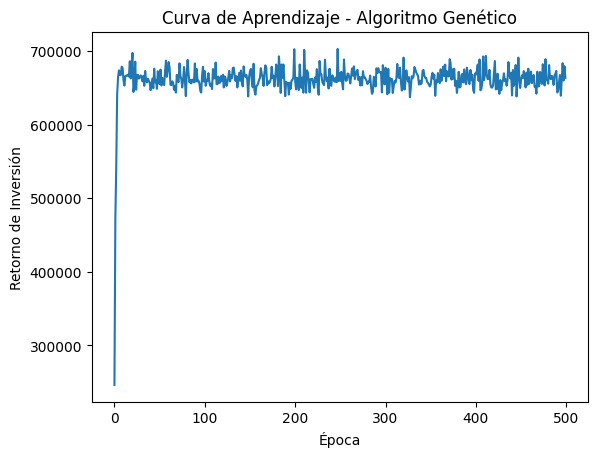

702662.9726956208
vector de ponderacion: [0.19601197 0.15607518 0.1395496  0.12296028 0.11486181 0.0973423
 0.09551015 0.07768871]


In [ ]:
rate=0.01
N=500
num_robots = N
num_epocas = N

robots = [Robot(C, Ca, R, rate) for _ in range(num_robots)]
mejores_retornos = []


for epoca in range(num_epocas):
    retornos = np.array([robot.f for robot in robots])
    mejor_retorno = np.max(retornos)
    mejores_retornos.append(mejor_retorno)
    num_seleccionados = int(num_robots * 0.1)
    indices_mejores = retornos.argsort()[-num_seleccionados:]
    mejores_robots = [robots[i] for i in indices_mejores]

    nueva_poblacion = []
    for _ in range(num_robots):
        padre, madre = np.random.choice(mejores_robots, 2)
        nuevo_robot = Robot(C, Ca, R, rate)
        nuevo_robot.r = (padre.r + madre.r) / 2
        nuevo_robot.mutar(R)
        nueva_poblacion.append(nuevo_robot)
    robots = nueva_poblacion


plt.plot(range(num_epocas), mejores_retornos)
plt.xlabel("Época")
plt.ylabel("Retorno de Inversión")
plt.title("Curva de Aprendizaje - Algoritmo Genético")
plt.show()

mejor_robot = max(robots, key=lambda robot: robot.f)
mejor_pesos = mejor_robot.r

mejor_retorno_final = max(mejores_retornos)
print(mejor_retorno_final)
print("vector de ponderacion:" , mejor_pesos)


In [ ]:
inversion_por_opcion = mejor_pesos * Ca
retornos = Ca * (mejor_pesos * C - 1)
retorno_minimo = np.min(retornos)
retorno_maximo = np.max(retornos)


print("la inversion por opcion es:",inversion_por_opcion)
print("el retorno minimo es:", retorno_minimo)
print("el retorno maximo es:", retorno_maximo)

la inversion por opcion es: [196011.96574993 156075.1805293  139549.59517225 122960.27837878
 114861.8117252   97342.30434304  95510.15328614  77688.71081536]
el retorno minimo es: 666882.9280529144
el retorno maximo es: 918134.2700313322


Se genera dinero.